Install preliminaries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Creating client key using API from polygon.io
from polygon import RESTClient
client = RESTClient(api_key="cWxjm9kYMt6VGw2sUCYocC3znFOfLKUF")


In [3]:
# Playing around with half of the dataset
df = pd.read_csv("/Users/ivan/Desktop/ivan_aps.csv")
df.head() 

# Converting the 'timestamp' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,tenaga,vol_tenaga,malakoff,vol_malakoff,ytl_power,vol_ytl_power,ytl_corp,vol_ytl_corp,gas_malaysia,...,frontken,vol_frontken,dando,vol_dando,pentamaster,vol_pentamaster,uwc,vol_uwc,jhm,vol_jhm
0,2025-01-01,14.750,4970.0,0.870,73190000.0,3.13,600880000.0,1.91,683330000.0,4.10,...,3.77,60680000.0,1.77,50880000.0,3.45,20730000.0,2.76,25860000.0,0.400,27710000.0
1,2024-12-01,14.750,6930.0,0.845,78070000.0,4.42,394860000.0,2.67,531130000.0,4.29,...,4.46,59420000.0,2.10,42440000.0,4.16,35720000.0,3.16,45360000.0,0.470,75340000.0
2,2024-11-01,12.880,6340.0,0.795,42300000.0,3.40,284070000.0,2.08,473920000.0,4.30,...,4.00,45150000.0,1.87,24500000.0,3.35,33220000.0,2.76,33400000.0,0.365,10580000.0
3,2024-10-01,13.515,14560.0,0.840,65450000.0,3.11,276980000.0,1.99,507230000.0,3.74,...,3.85,42250000.0,2.30,26180000.0,3.85,19810000.0,2.35,28820000.0,0.400,9580000.0
4,2024-09-01,14.380,2850.0,0.940,231970000.0,3.66,380820000.0,2.51,548620000.0,3.80,...,3.67,64380000.0,2.13,79310000.0,3.50,24790000.0,2.03,82810000.0,0.485,10630000.0


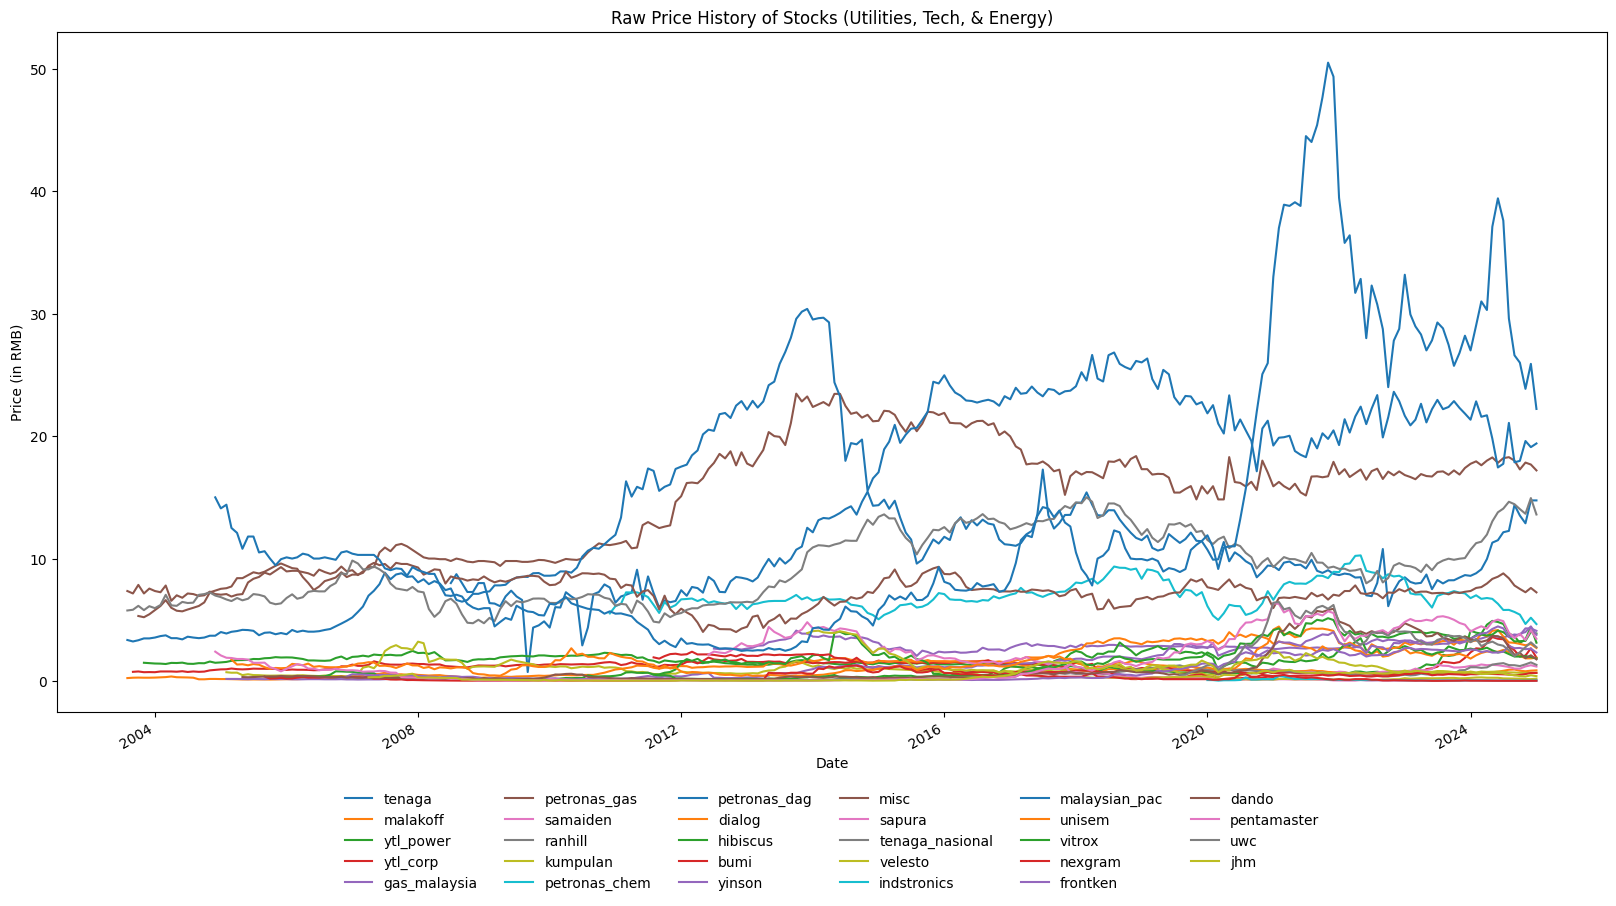

In [8]:
prices = [col for col in df.columns if not col.startswith('vol_') and col != 'Date']
price_plot = df.plot(x='Date', y=prices, figsize=(20,10))
plt.title('Raw Price History of Stocks (Utilities, Tech, & Energy)')
plt.xlabel('Date')
plt.ylabel('Price (in RMB)')

# Legend position
price_plot.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=6,
    frameon=False
)

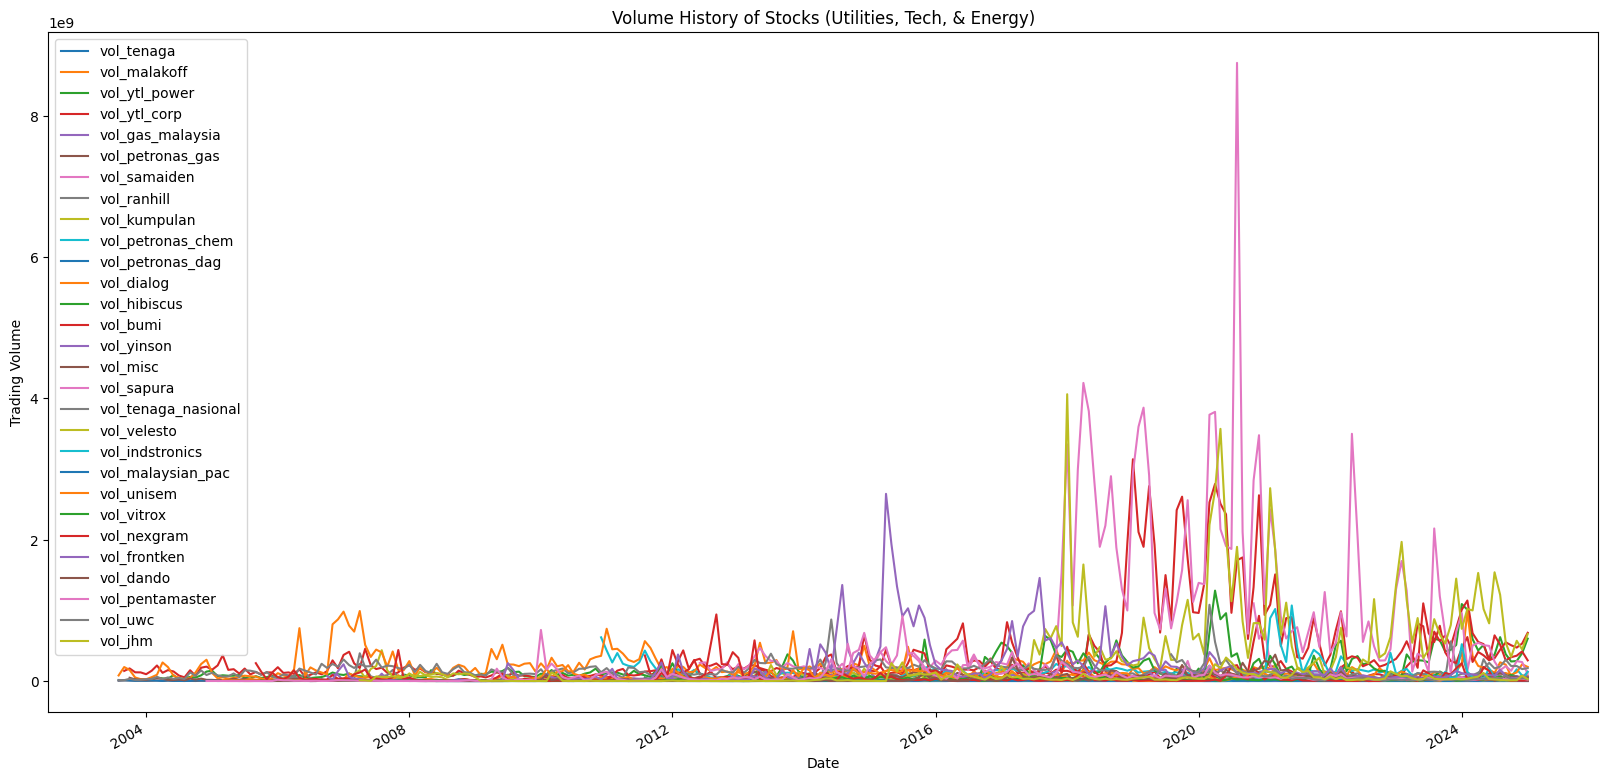

In [7]:
volume = [col for col in df.columns if col.startswith('vol_')]
vol_plot = df.plot(x='Date', y=volume, figsize=(20,10))
plt.title('Volume History of Stocks (Utilities, Tech, & Energy)')
plt.xlabel('Date')
plt.ylabel('Trading Volume')

# Legend position
price_plot.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=6,
    frameon=False
)

#### FMP API for Financial Data

In [7]:
from fmp_api_python.fmp import FMPClient
api_key = FMPClient("wKbOHByGYtfwOtGwltwMP8mqaG6brP2y")
# API keys changes daily